<h1 ><font color ='brown' > Bank Telemarketing Campaign Case Study.

## Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in the Data set. 

In [3]:
#reading the data set of "bank telemarketing campaign" in inp0.
inp0=pd.read_csv('bank_marketing_updated_v1.csv')

In [4]:
#Printing the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


##  Data Cleaning 

#### Reading the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv('bank_marketing_updated_v1.csv',skiprows=2)

In [6]:
#printing the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
inp0.shape

(45211, 19)

####  Data Types 

In [8]:
#printing the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.



### Imputing/Removing missing values 

In [9]:
# The percentage of missing values in each column
100*inp0.isnull().sum()/len(inp0)

customerid    0.000000
age           0.044237
salary        0.000000
balance       0.000000
marital       0.000000
jobedu        0.000000
targeted      0.000000
default       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
month         0.110593
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome      0.000000
response      0.066356
dtype: float64


--------------------

#### Missing values in age column
- In the data set there are 45211 rows
- Age is missing in 20 entries
- Missig values are only 4% of the entire data set 
- I do not want to impute missing age values with any other number, so I will just remove these 20 entries from data set.

In [10]:
#Dropping the records with age missing. 
inp0 = inp0[~inp0.age.isna()]

#### Missing values in month column

- 11% of the data is missing values for month column
- I will replace the missing values with mode of the month (as it is a categorical variable)

In [11]:
#printing the percentage of each month in the data frame inp0
100*inp0.month.value_counts(normalize=True)

may, 2017    30.437961
jul, 2017    15.252210
aug, 2017    13.812277
jun, 2017    11.814094
nov, 2017     8.788020
apr, 2017     6.490773
feb, 2017     5.861634
jan, 2017     3.105824
oct, 2017     1.632662
sep, 2017     1.276002
mar, 2017     1.054474
dec, 2017     0.474070
Name: month, dtype: float64

In [12]:
# filling the missing values with mode value of month in inp0.
inp0.month=inp0.month.fillna(inp0.month.mode()[0])

#### Missing values in response column

- response is missing for 6.6% of the data
- Target variable is better of not imputed.
- So dropping the records with missing values.

In [13]:
#dropping the records with response missings in inp0.
inp0=inp0[-inp0.response.isnull()]

In [14]:
#The percentage of missing values in each column after handling missing vales
100*inp0.isnull().sum()/len(inp0)

customerid    0.0
age           0.0
salary        0.0
balance       0.0
marital       0.0
jobedu        0.0
targeted      0.0
default       0.0
housing       0.0
loan          0.0
contact       0.0
day           0.0
month         0.0
duration      0.0
campaign      0.0
pdays         0.0
previous      0.0
poutcome      0.0
response      0.0
dtype: float64

- All the missing values have been handled properly

In [15]:
#converting the age variable data type from float to integer.
inp0['age']=inp0['age'].astype(int)

#### Dropping customer id column. 

In [16]:
#drop the customer id as it is of no use.
inp0.drop('customerid',axis=1,inplace=True)

#### Dividing "jobedu" column into job and education categories. 

In [17]:
#Extracting job in a newly created 'job' column from "jobedu" column.
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0])

#Extracting education in a newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.apply(lambda x: x.split(',')[1])


In [18]:
#dropping the "jobedu" column from the dataframe.
inp0.drop("jobedu",axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [19]:
#Extracting month from month column
inp0['month']=inp0.month.apply(lambda x:str(x).split(",")[0])


-----------

#### handling pdays column. 

In [20]:
#describe the pdays column of inp0.
inp0.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [21]:
inp0.pdays.tail()

45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, dtype: int64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- to ignore the missing values in the calculations
-  by simply making it missing(replacing -1 with NaN.)
-  For all summary statistics- mean, median,I will ignore the missing values of pdays.

In [22]:
#describing the pdays column after replacing -0 values with Nan
inp0.loc[inp0.pdays<0,'pdays']=np.NaN
inp0.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

###  Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [23]:
#describing the age variable in inp0.
inp0.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

- Here mean and median are almost same, and quantiles are increasing slowly <br>
- Difference between 75 th percentile and max is not drastically large<br>
- These  are all implying that there isn't much of an issue of outliers

<AxesSubplot:ylabel='Frequency'>

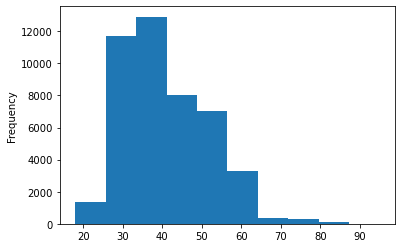

In [24]:
#plotting the histogram of age variable.
inp0.age.plot.hist()

Most densities around 30-40 <br>
least near 80-90

<AxesSubplot:xlabel='age'>

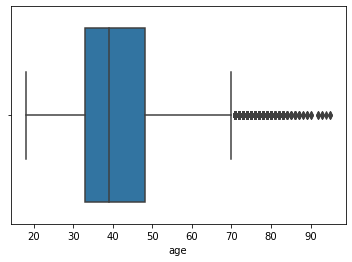

In [25]:
#plotting the boxplot of age variable.
sns.boxplot(inp0.age)

There is not much gap between values outside to the upper fence  and it ispretty much continuous<br>
so this doesn't seem to be outliers and I will not consider them as outliers

- The values above upper fence can be treated as the normal values of age because any person can be over 70 or 80 years of age.

- Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

#### Salary variable 

In [26]:
#describing the salary variable of inp0.
inp0.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

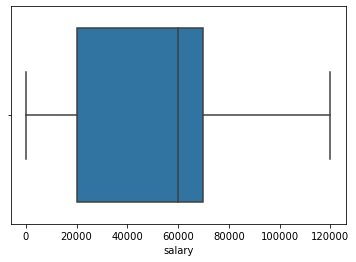

In [27]:
#plotting the boxplot of salary variable.
sns.boxplot(inp0.salary)   #no outliers

#### Balance variable 

In [28]:
#describing the balance variable of inp0.
inp0.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

- Minmum is a negative value, but these are expected for balance<br>
- Large diff between median and mean-suspecious <br>
- between median and 75th percenetile there is 3x jump.<br>
- Very high difference from 75th percentile to max (close to 7 times)


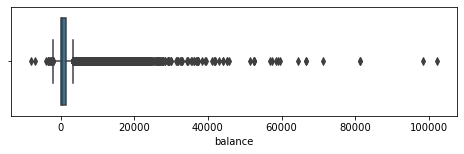

In [29]:
#plotting the boxplot of balance variable 
plt.figure(figsize=[8,2])
sns.boxplot(inp0.balance)
plt.show()

- Most of the data are compressed in a very small region<br>
- After upper fence you have high values but in continuous form for a range - this is also expcted<br>
- After that There are few values which are very high and not continuous


In [30]:
#printing the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp0.balance.quantile([.5,.7,.9,.95,.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

95% of the peopl have balance of 5769 or lesss <br>
99% data is or below 13173 <br>
look into the boxplot, 13k is 99th percentile, only 1% of people have balance above 13173


In [31]:
inp0[inp0.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


1. These people with higher balance are fom the higher side of the age
2. higher in terms of salary
3. have responded positively in the previous campaign

4. These are people with very high balance and these aren't invalid records
5. At the moment I would suspect that these people would be more prone to accepting the campaign.
6. So I dun wanna drop these individuals
7. I could either cap them with 13k or instead of looking at mean, I could loook at quantiles/medians/perceniles      instead. cos these are not affected by your outliers.




#### salary variable

In [32]:
inp0.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

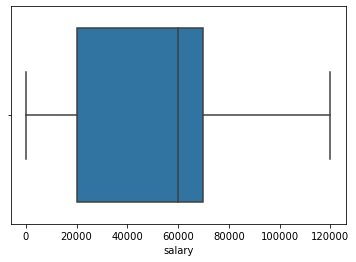

In [33]:
sns.boxplot(inp0.salary)

- There are no outliers in the salary variable

###  Standardising values 

#### Duration variable

In [34]:
#describing the duration variable of inp0
inp0.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [35]:
#dtype is object which needs to be changed to a numeric type
# we have entries in either minutes or in seconds, we have to extract the number part and then standardise the unit


In [36]:
inp0.duration.value_counts()

1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
1.73333333333333 min    127
2.03333333333333 min    127
                       ... 
1500 sec                  1
22.1666666666667 min      1
868 sec                   1
1269 sec                  1
16.2833333333333 min      1
Name: duration, Length: 2646, dtype: int64

In [37]:
#converting the duration variable into single unit i.e. minutes. and removing the sec or min prefix.
inp0.duration=inp0.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else x.split()[0])

In [38]:
#describing the duration variable
inp0.duration.describe()

count     45161
unique     2646
top         1.5
freq        138
Name: duration, dtype: object

## Univariate Analysis 

###  Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [39]:
#calculating the percentage of each marital status category. 
inp0.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

<AxesSubplot:>

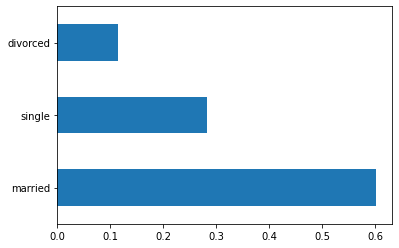

In [40]:
#plotting the bar graph of percentage marital status categories
inp0.marital.value_counts(normalize=True).plot.barh()

- Most of the customers are married

#### Job  

In [41]:
#calculating the percentage of each job status category.
inp0.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

<AxesSubplot:>

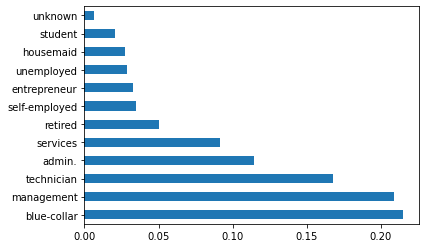

In [42]:
#plotting the bar graph of percentage job categories
inp0.job.value_counts(normalize= True).plot.barh()

- Most of the customers have blue collar jobs

### Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [43]:
#calculating the percentage of each education category.
inp0.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

<AxesSubplot:ylabel='education'>

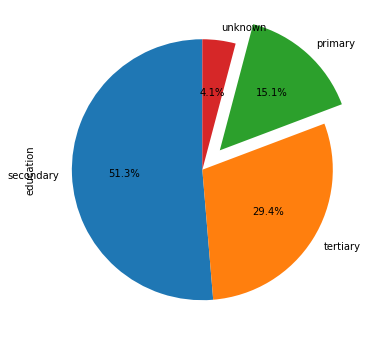

In [44]:
#plotting the pie chart of education categories
explode=(0,0,.2,0)
plt.figure(figsize=[6,6])
inp0.education.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=explode,startangle=90)


- Most of the customers have secondary/tertiary level education

#### poutcome variable

In [45]:
#calculating the percentage of each poutcome category.
inp0.poutcome.value_counts(normalize=True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

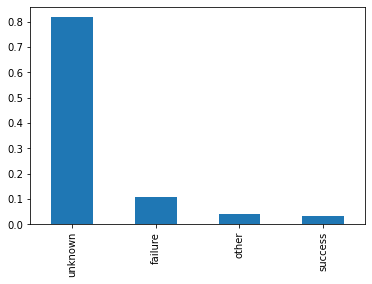

In [46]:
inp0.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

- For majority of the current cases, the previous campaign was not done
- For others who were part of the previous campaign,failure was the frequent category than success.

#### Response -  the target variable 

In [47]:
#calculating the percentage of each response category.
inp0.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

<AxesSubplot:ylabel='response'>

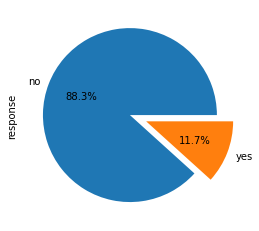

In [48]:
#plotting the pie chart of response categories
explode=(0,.2)
inp0.response.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',explode=explode)

------------

##  Bivariate and Multivariate Analysis

###  Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

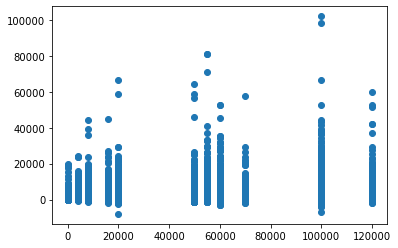

In [49]:
#plotting the scatter plot of balance and salary variable in inp0
plt.scatter(inp0.salary,inp0.balance)

- It doesn't seem to have much of an association between variables

<AxesSubplot:xlabel='age', ylabel='balance'>

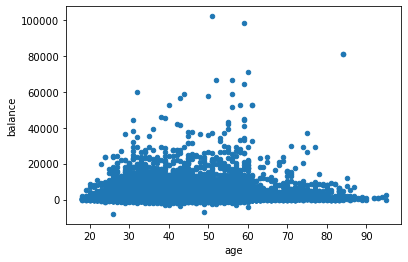

In [50]:
#plotting the scatter plot of balance and age variable in inp1

inp0.plot.scatter('age','balance')

- No general pattern is observed

<Figure size 648x1152 with 0 Axes>

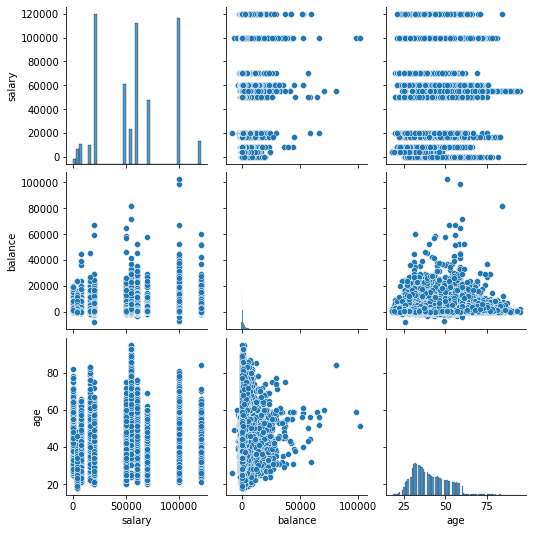

In [51]:
#plotting the pair plot of salary, balance and age in inp1 dataframe.
plt.figure(figsize=[9,16])
sns.pairplot(inp0,vars=['salary','balance','age'])
plt.show()

- Visually there is no strong association between variables.

#### Correlation heat map 

In [52]:
# looking at the correlation score among salary, balance and age
inp0[['salary','balance','age']].corr() #quantifying the asssociation

,salary,balance,age
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


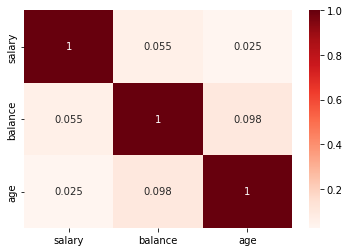

In [53]:
#plotting the correlation matrix of salary, balance and age in inp0 dataframe.
sns.heatmap(inp0[['salary','balance','age']].corr(),annot=True,cmap='Reds')
plt.show()

- Association is very weak among these variables

###  Numerical categorical variable

#### Salary vs response 

In [54]:
#grouping the response to find the mean of the salary with response no & yes seperatly.
inp0.groupby('response')['salary'].mean()  

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

- not much of difference between mean salaries,
- however mean is influenced, so let's look at median

In [55]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp0.groupby('response')['salary'].median() 

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

- Even the medians are same.

<AxesSubplot:xlabel='response', ylabel='salary'>

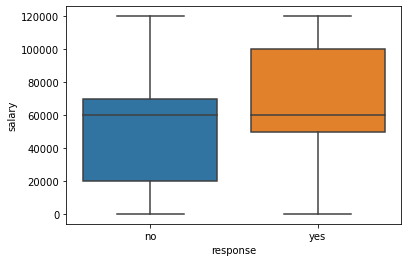

In [56]:
#plotting the box plot of salary for yes & no responses.
sns.boxplot(data=inp0,x='response',y='salary')

` Median values are same for both the groups, however once you make boxplots it clearly shows that the people who responded positively have higher salaries.The interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.`


#### Balance vs response 

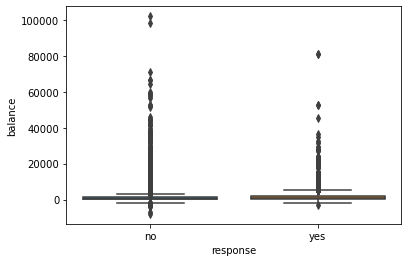

In [57]:
#plotting the box plot of balance for yes & no responses.
sns.boxplot(data=inp0,x='response',y='balance')
plt.show()

- can't see anything cos the bulk in both is very close to zero, view of the boxplot is also affected by the outliers.
here boxplot isn't a great idea

In [58]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp0.groupby('response')['balance'].mean() 

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

mean value is higher for yes

##### 75th percentile 

In [59]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [60]:
#calculating the mean, median and 75th percentile of balance with response
inp0.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<AxesSubplot:xlabel='response'>

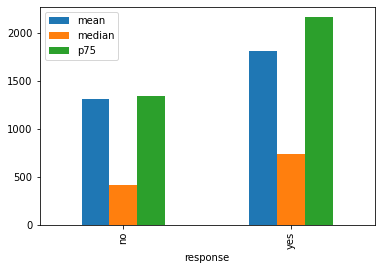

In [61]:
# plotting the mean,median and 75th percentile of balance for different responses
inp0.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()

`Seems like people with higher balance are more likely to accept the offer`

#### Education vs salary 

In [62]:
#groupby the education to find the mean of the salary education category.
inp0.groupby('education')['salary'].aggregate(['mean','median',p75])

,mean,median,p75
education,,,
primary,34232.343910,20000.0,55000.0
secondary,49731.449525,55000.0,60000.0
tertiary,82880.249887,100000.0,100000.0
unknown,46529.633621,50000.0,70000.0


- Salaries of people with higher educations are higher than that of people with primary level education

### Categorical categorical variable 

- For comvienience I am creating a numerical variable containg information about the response 

In [63]:
#creating a response_flag of numerical data type where response "yes"= 1, "no"= 0
inp0['response_flag']=np.where(inp0.response=='yes',1,0)

#### Education vs response rate

In [64]:
#calculating the mean of response_flag with different education categories.
inp0.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

- As the level of education increases, the positive response rate increases

#### Marital vs response rate 

In [65]:
#calculating the mean of response_flag with different marital status categories.
inp0.groupby('marital')['response_flag'].mean()


marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

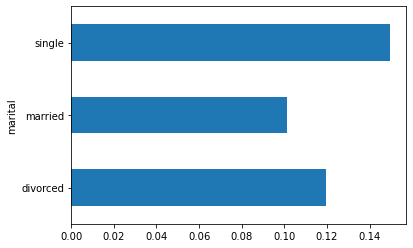

In [66]:
#plotting the bar graph of marital status with average value of response_flag
inp0.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

- Customers who are single are more likely to accept the offer
- So it is better to target single people!!!!

#### Loans vs response rate 

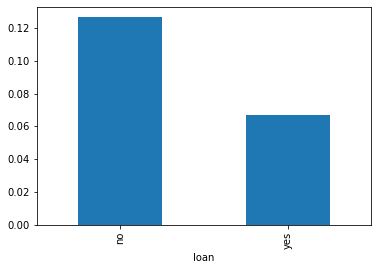

In [67]:
#plotting the bar graph of personal loan status with average value of response_flag
inp0.groupby('loan')['response_flag'].mean().plot.bar()
plt.show()

#### Housing loans vs response rate 

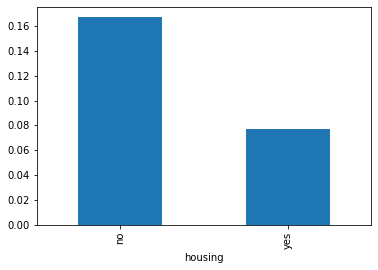

In [68]:
#plotting the bar graph of housing loan status with average value of response_flag
inp0.groupby('housing')['response_flag'].mean().plot.bar()
plt.show()

#### Age vs response 

<AxesSubplot:xlabel='response', ylabel='age'>

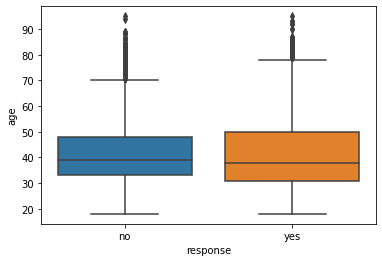

In [69]:
#plotting the boxplot of age with response_flag
sns.boxplot(data=inp0,x='response',y='age')

- Median values are pretty much the same,
- Average values are also similar,
- But we do see something going on the higher age range.
upper fence is higher for people who responded yes.


##### Making buckets from age columns 

In [70]:
#creating the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp0['age_grp']=pd.cut(inp0.age,[0,30,40,50,60,999],labels=['<30','0-40','40-50','50-60','>60'])
inp0.age_grp.head()

0    50-60
1    40-50
2     0-40
3    40-50
4     0-40
Name: age_grp, dtype: category
Categories (5, object): ['<30' < '0-40' < '40-50' < '50-60' < '>60']

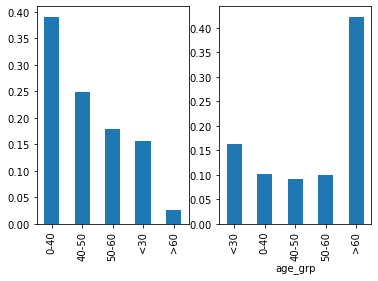

In [71]:
#plotting the percentage of each buckets and then the average values of response_flag in each buckets.
plt.subplot(1,2,1)
inp0.age_grp.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp0.groupby('age_grp')['response_flag'].mean().plot.bar()
plt.show()

- The bank has mostly contacted people in the age group of 30-50, and have made much less contact with people in the age group of 60+ (plot-I), although the chances of getting a positive response are higher from the people who are in the age group of 50+ or 60+ (as shown in plot-II). This is a very important insight that one can draw from this data set, i.e., the bank should target the people in the 50+ age group.

<AxesSubplot:xlabel='job'>

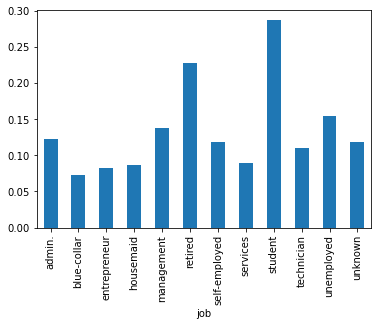

In [72]:
#plotting the bar graph of job categories with response_flag mean value.
inp0.groupby('job')['response_flag'].mean().plot.bar()

- Students and retired individuals are more likely to accept the offer

###  Multivariate analysis 

#### Education vs marital vs response 

In [73]:
#creating heat map of education vs marital vs response_flag
res=pd.pivot_table(data=inp0,index='education',columns='marital',values='response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


#### Education vs marital vs response 

<AxesSubplot:xlabel='marital', ylabel='education'>

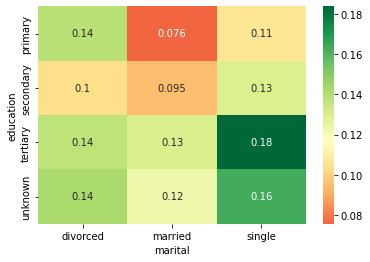

In [74]:
#creating the heat map of Education vs marital vs response_flag.
#should be centered around neutral response rate-overall response rate ie,yellow at 11.7%

sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.117) 

In [75]:
inp0.response_flag.value_counts(normalize=True)

0    0.882974
1    0.117026
Name: response_flag, dtype: float64

#### Education vs poutcome vs response

In [76]:
#creating a heat map of education vs poutcome vs response_flag.

res2=pd.pivot_table(data=inp0, index='education',columns='poutcome',values='response_flag')
res2

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


- In the previous case center was around 11.7 overall response rate 
- But here it is not the right center,beacuse when we have poutcome, we are atually looking at the guys who were  contacted earlier.so may be for this people the aerage isn't 11.7.may be it is different, and that should be the actual reference for color coding.

In [77]:
inp0[inp0.pdays>0].response_flag.mean()

0.2307785593014795

<AxesSubplot:xlabel='poutcome', ylabel='education'>

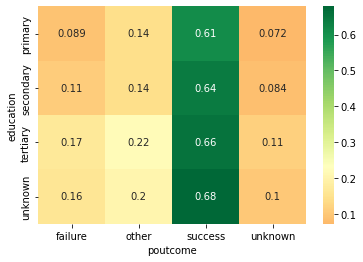

In [78]:
sns.heatmap(res2,annot=True,cmap='RdYlGn',center=0.2308)

#### job vs marital vs response

<AxesSubplot:xlabel='marital', ylabel='job'>

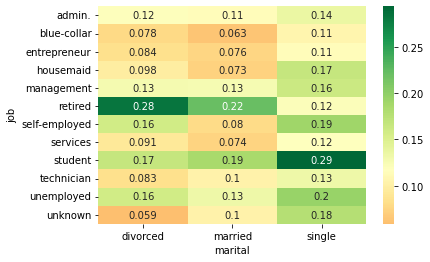

In [79]:
res3=pd.pivot_table(data=inp0, index='job',columns='marital',values='response_flag')
sns.heatmap(res3,annot=True,cmap='RdYlGn',center=0.117)

### Summary

- Overall positive response rate of the campaign is 11.7
- The people who responded positively to the campaign have higher salaries. This is actually true, because people who have higher salaries are more likely to invest in term deposits.
- People with higher bank balance are more likely to accept the offer.
- The positive response rate increases the level of education individuals had.
- Customers who are single are more likely to accept the offer, So it is better to target single people!!!!
- People who alreay have bank loans are less likely to start term deposits.
- The bank has mostly contacted people in the age group of 30-50, and have made much less contact with people in the age group of 60+, although the chances of getting a positive response are higher from the people who are in the age group of 50+ or 60+. This is a very important insight that one can draw from this data set, i.e., the bank should target the people in the 50+ age group.
- Students and retired individuals are more likely to accept the offer.
- Other few potentia target groups for maximumizing the positive response rate are
    - Single people with tertiary level of education
    - People who responded positively in the previous campaign
    - Single or Divorced retired individuals